## SEABORN IN PYTHON 

In [7]:
#import lib
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [12]:
tip_df = sns.load_dataset('tips')

In [14]:
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Numerical Plots
- `Distribution` :
  + Hist
  + KDE
- `Join Plot`
- `Pair Plot`
- `Bar Plot`
- `Count Plot`
- `Facet Plot` : tạo ra một lưới 2d gồm các bảng được xác định bởi các biến tạo thành các hàng và cột.
- `Box Plot` : tạo ra một lưới 2d gồm các bảng được xác định bởi các biến tạo thành các hàng và cột.
- `Heat Plot` : tạo ra một lưới 2d gồm các bảng được xác định bởi các biến tạo thành các hàng và cột.i chiều

## Distribution Plot 
* phân phối đơn biến của các quan sát

### Hist plot

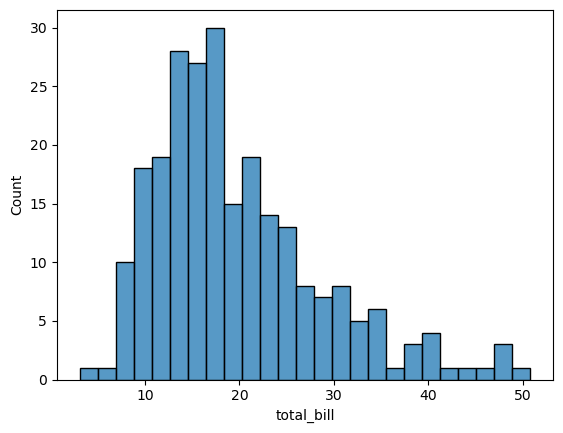

In [27]:
sns.histplot(tip_df['total_bill'], bins=25); 
# bins : chia dữ liệu thành các khoảng

### KDE Plot
+ A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram.+ 
KDE represents the data using a continuous probability density curve in one or more dimension

#### `Dịch` :
+ Biểu đồ ước tính mật độ hạt nhân (KDE) là một phương pháp để trực quan hóa sự phân bố các quan sát trong tập dữ liệu, tương tự như biểu đồ.+ 
KDE biểu thị dữ liệu bằng cách sử dụng đường cong mật độ xác suất liên tục theo một hoặc nhiều chiềus

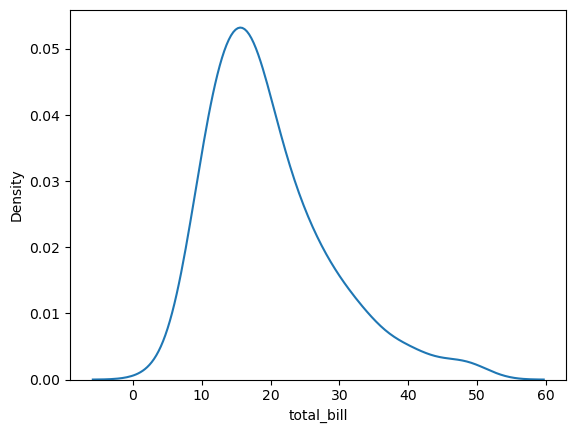

In [33]:
sns.kdeplot(tip_df['total_bill']);

## Joint Plot
+ `Joint` : phân phối giữa hai biến cùng với phân phối biên của mỗi biến

In [37]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


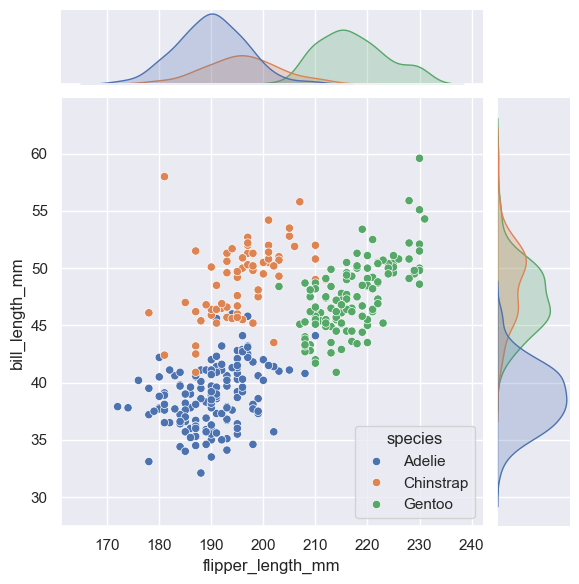

In [45]:
# Áp dụng chủ đề mặc định
sns.set_theme()
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species");

# phân phối giữa hai biến cùng với phân phối biên của mỗi biến

## Pair Plots
+ `Pair Plots` (đồ thị cặp) : là một [phương pháp trực quan hóa dữ liệu] mạnh mẽ giúp hiển thị mối quan hệ giữa các biến số theo cặp trong một tập dữ liệu.
+ `Pair Plots` tạo ra một ma trận các biểu đồ, trong đó mỗi ô hiển thị mối quan hệ giữa hai biến số cụ thể.

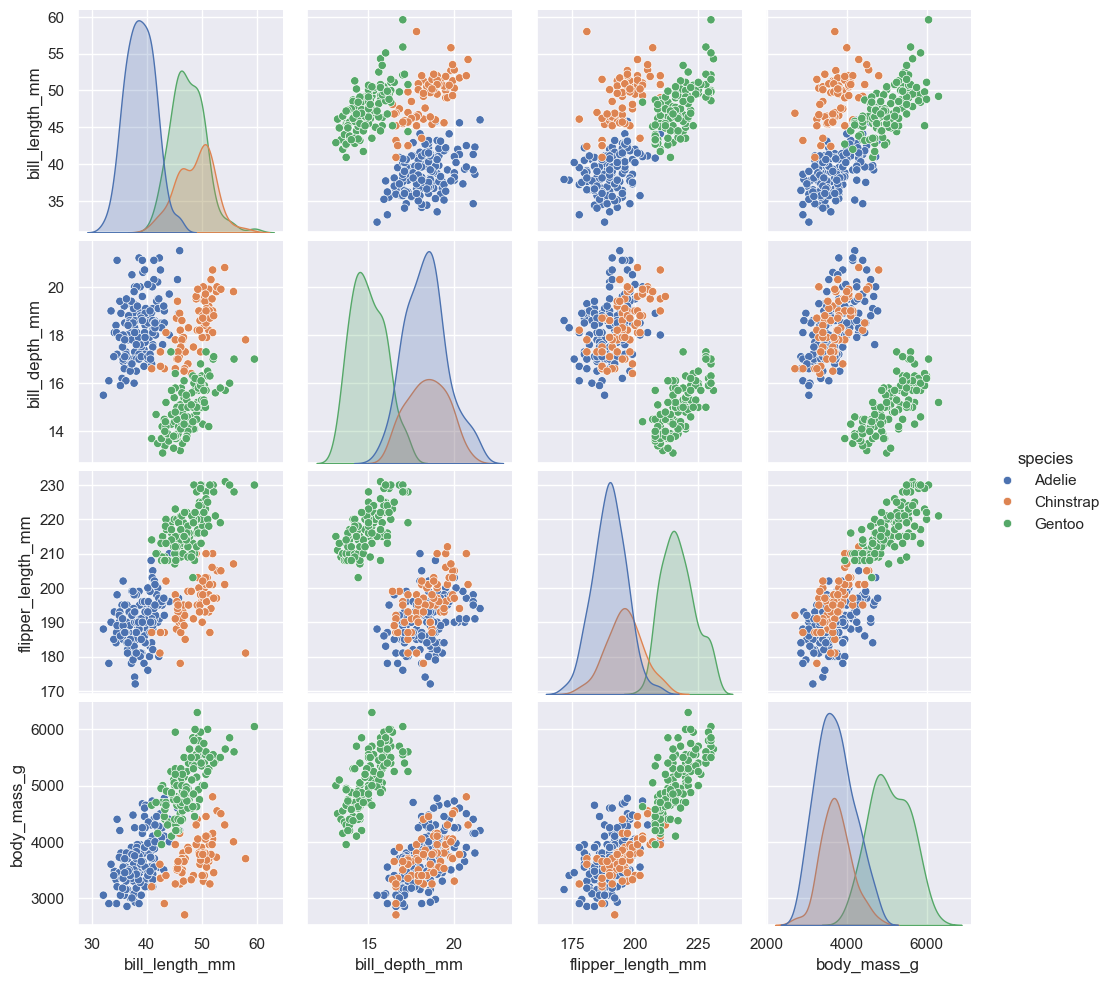

In [48]:
sns.pairplot(data=penguins, hue="species");

# Categorical Plots

## Bar Plots
+ `estimator` theo mặc định = trung bình, bạn có thể chuyển bất cứ thứ gì bạn muốn như np.cov, np.std hoặc thậm chí là hàm của riêng bạn

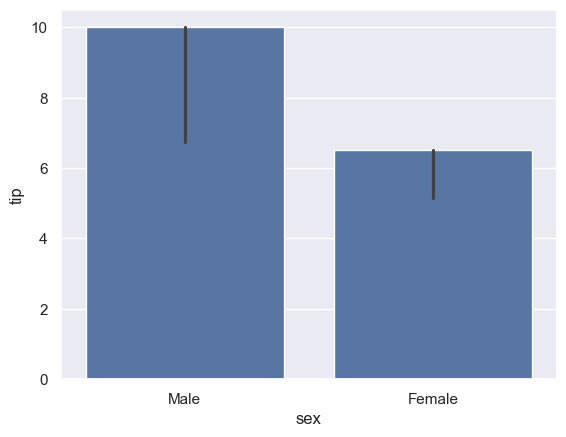

In [59]:
sns.barplot(x="sex", y='tip', data=tip_df, estimator=np.max);

## Cunt Plot
+ `Count plot`(đồ thị đếm) là một dạng biểu đồ thanh được sử dụng để hiển thị số lượng lần xuất hiện của mỗi giá trị trong một biến phân loại.
+ Nó hữu ích để `so sánh tần suất` của các danh mục khác nhau trong một tập dữ liệu.

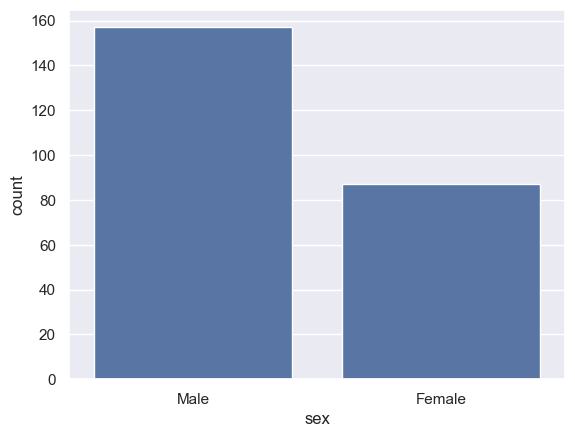

In [65]:
sns.countplot(x='sex', data=tip_df);

## Facet Grid+ `
FacetGri`d can be drawn with up to three dimensions: row, col, and hu.
+ 
The main approach for visualizing data on this grid is with the FacetGrid.map() metho

### DỊCH:
+ `FacetGrid` có thể được vẽ với tối đa ba chiều: hàng, cột và màu sắc.+ 
Cách tiếp cận chính để trực quan hóa dữ liệu trên lưới này là sử dụng phương thức FacetGrid.map().d.

In [72]:
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


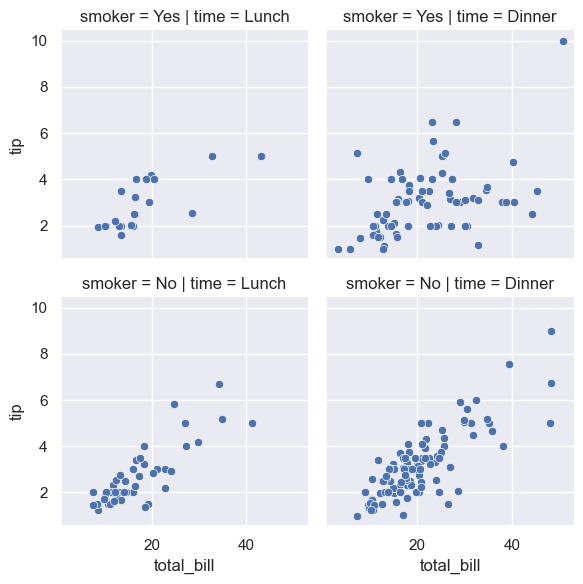

In [74]:
tip_fg = sns.FacetGrid(tip_df, col="time", row="smoker")
tip_fg.map(sns.scatterplot, 'total_bill', 'tip');

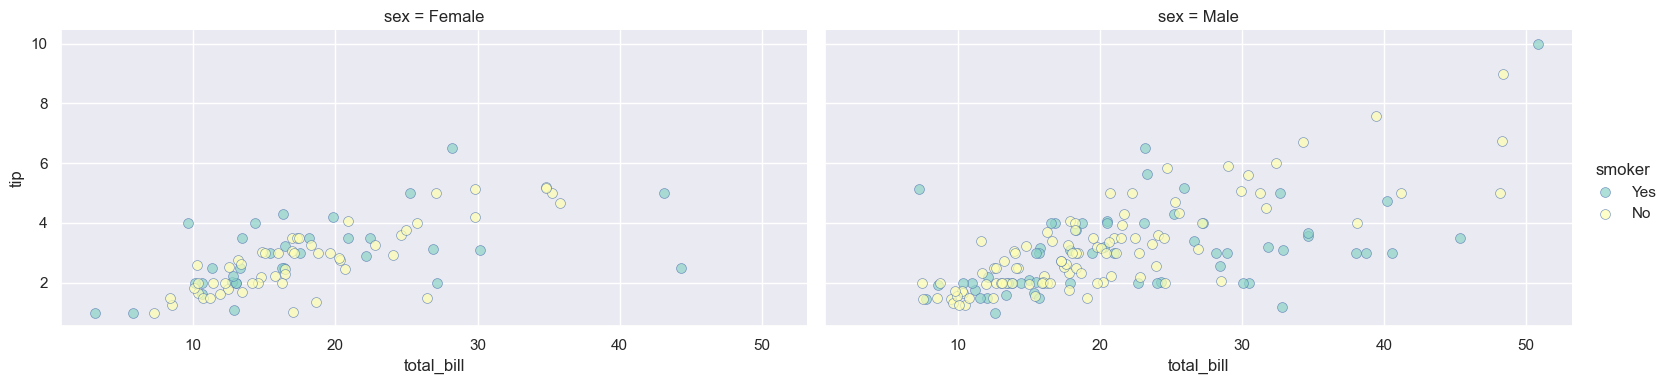

In [82]:
# keyword argument
kws = dict(s=50, linewidth=.5, edgecolor='b',alpha=.7) 

tip_fg = sns.FacetGrid(tip_df, 
                       col='sex',
                       hue='smoker',
                       height=4,
                       aspect=2,
                       col_order=['Female', 'Male'], 
                       palette='Set3', #color
                       legend_out=True)

tip_fg.map(sns.scatterplot, 'total_bill', 'tip', **kws)
tip_fg.add_legend();

## Box Plot
+ `Box Plot` là một dấu hiệu tốt về cách phân bổ các giá trị trong dữ liệu
+ 
Xác định các ngoại 
+ Kiểm tra xem dữ liệu có đối xứng không
+ Xác định mức độ chặt chẽ của dữ liệu được nhómnhóm

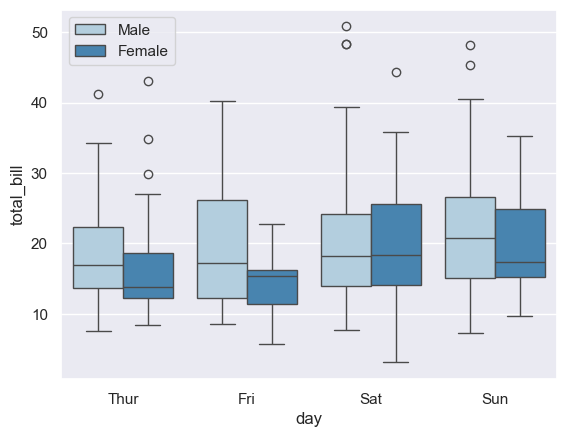

In [87]:
sns.boxplot(x='day',
            y='total_bill',
            data=tip_df,
            hue='sex',
            palette='Blues');

plt.legend(loc=0);

## Heatmaps
+ Mô tả mật độ hoặc cường độ của các biến, trực quan hóa các mẫu, phương sai và thậm chí cả những điểm bất thường.

In [9]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [11]:
flights = pd.pivot_table(flights, index='month', columns='year',values='passengers')
flights

C:\Users\Admin\AppData\Local\Temp\ipykernel_25664\1178195675.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights = pd.pivot_table(flights, index='month', columns='year',values='passengers')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


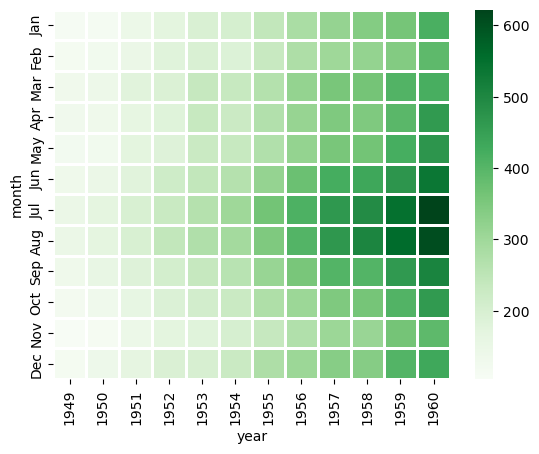

In [17]:
sns.heatmap(flights, cmap='Greens', linecolor='White', linewidth=1);